###Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Upload Dataset

In [1]:
from google.colab import files
uf = files.upload()

Saving advertising.csv to advertising.csv


###Read Dataset

In [5]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###Check any NULL Values and Duplicates

In [9]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

###Split Data Training and Testing

In [12]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 42)

In [14]:
x_train.shape

(160, 3)

In [15]:
x_test.shape

(40, 3)

In [16]:
y_train.shape

(160,)

In [17]:
y_test.shape

(40,)

###Build Model

In [18]:
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

####Predict Sales

In [19]:
y_pre = model.predict(x_test)

In [20]:
y_pre

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

###Evaluate the Model

In [21]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 2.9077569102710896
R² Score: 0.9059011844150826


###Actual Sales vs Predicted Sales

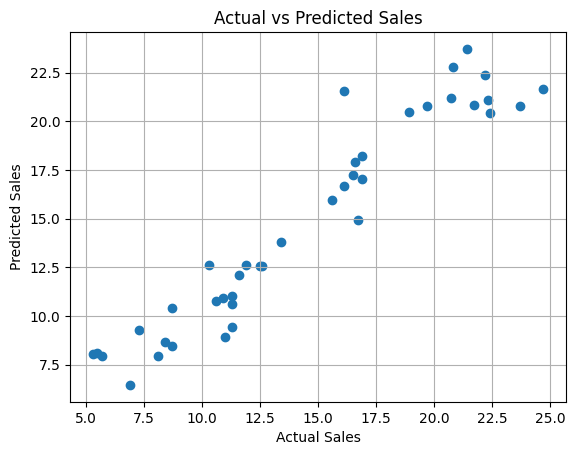

In [23]:
plt.scatter(y_test, y_pre)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

###Predict Sales for a New Scenario

In [24]:
tv_spend = 200
radio_spend = 30
newspaper_spend = 50
new_data = [[tv_spend, radio_spend, newspaper_spend]]
predicted_sales = model.predict(pd.DataFrame(new_data, columns=x.columns))
print("Predicted Sales for the New Scenario:", predicted_sales[0])

Predicted Sales for the New Scenario: 18.86117378254846


###User Input and Predict Sales

In [26]:
tv_spend = float(input("Enter TV Advertising Spend: "))
radio_spend = float(input("Enter Radio Advertising Spend: "))
newspaper_spend = float(input("Enter Newspaper Advertising Spend: "))

user_data = [[tv_spend, radio_spend, newspaper_spend]]
user_prediction = model.predict(pd.DataFrame(user_data, columns=x.columns))

print("\n Predicted Sales:", user_prediction[0])

Enter TV Advertising Spend: 150
Enter Radio Advertising Spend: 25
Enter Newspaper Advertising Spend: 10

 Predicted Sales: 15.457517555841328


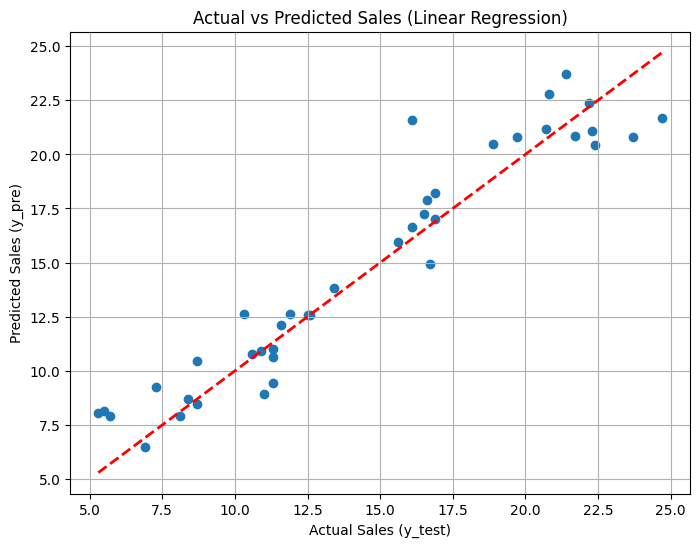

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pre)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sales (y_test)")
plt.ylabel("Predicted Sales (y_pre)")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.grid(True)
plt.show()

In [28]:
import joblib
joblib.dump(model, "advertising_model.pkl")

['advertising_model.pkl']